In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functools as ft

In [26]:
portf=pd.read_excel('Industry_Portfolios.xlsx')
portfolio=portf.drop(columns=['Date'])

C:\Users\1\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


In [28]:
# Let's calculate mean returns

returns=portfolio.mean()
print("Mean Returns:", returns)

Mean Returns: NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64


In [29]:
# Let's calculate covar matrix

covar = portfolio.cov().values
print ("Covariance matrix:", covar)

Covariance matrix: [[11.19342216 18.44966611 14.10490703 10.5313412  12.92294937 11.96807831
  10.17083232  9.95311174  7.86665347 14.4384085 ]
 [18.44966611 69.92057703 39.1780972  27.0197944  35.4666521  27.49054314
  27.44473081 16.82400308 12.74613641 39.36198711]
 [14.10490703 39.1780972  28.19897006 23.14537986 24.61873929 19.55014973
  17.62286678 13.59644703 11.4406123  26.31342279]
 [10.5313412  27.0197944  23.14537986 36.98493308 19.26727584 15.36681682
  11.29780011  9.63032658 14.02716804 18.32046915]
 [12.92294937 35.4666521  24.61873929 19.26727584 28.95722027 18.70827342
  17.83711471 13.25406408 10.30418676 23.85547048]
 [11.96807831 27.49054314 19.55014973 15.36681682 18.70827342 19.78722739
  14.16935566 11.50659873 10.99159564 19.61083576]
 [10.17083232 27.44473081 17.62286678 11.29780011 17.83711471 14.16935566
  16.75908392 10.17884947  6.69435003 19.22652434]
 [ 9.95311174 16.82400308 13.59644703  9.63032658 13.25406408 11.50659873
  10.17884947 14.34266922  7.475

In [30]:
# Now let's make a table that shows mean return and standard deviation for all portfolios

table=portfolio.agg(['mean','std'])
table

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
mean,0.902833,0.733333,1.012833,1.231167,0.766250,0.881417,0.916333,0.783833,0.907167,0.489083
std,3.345657,8.361852,5.310270,6.081524,5.381191,4.448284,4.093786,3.787172,3.701763,5.582452


In [35]:
# Introducing the variables

returns=portfolio.mean()
covar = portfolio.cov().values
inv_covar = np.linalg.inv(covar)
e_vector = np.ones(len(returns))

alpha = ft.reduce(np.matmul, [returns.T, inv_covar, e_vector])
delta = ft.reduce(np.matmul,[e_vector.transpose(),inv_covar,e_vector])
zeta = ft.reduce(np.matmul, [returns.T, inv_covar, returns])

# Calculating var and stdev of return for frontier portfolio
frontier_mean_return = np.array(np.arange(0.00, 2.0, 0.1)) #for graph
global_minimum_var_return = alpha / delta # Our Rmv
frontier_var = np.vectorize(lambda rp: (1 / delta) + (delta / (zeta * delta - alpha ** 2)) *\
                            ((rp - global_minimum_var_return) ** 2))(frontier_mean_return) # ppt slide 13
frontier_std = frontier_var ** 0.5

# Creating of the frontier plot df
frontier_plot = pd.DataFrame(data = {"stddev_minvar" : frontier_std, "r_minvar" :frontier_mean_return})

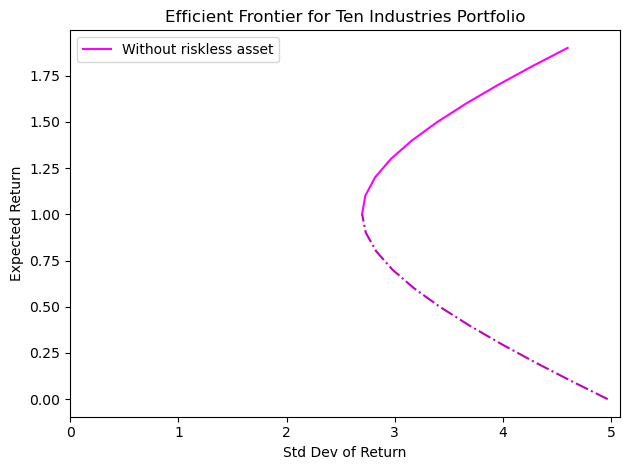

In [50]:
midpoint = int(len(frontier_plot) / 2)

# Plotting Efficient Frontier (without riskless assets)
plt.plot(frontier_plot.iloc[midpoint:]["stddev_minvar"], frontier_plot.iloc[midpoint:]["r_minvar"], label = "Without riskless asset", color='magenta')
plt.plot(frontier_plot.iloc[0:midpoint+1]["stddev_minvar"], frontier_plot.iloc[0:midpoint+1]["r_minvar"], "m-.")

# Plotting Efficient Frontier (with riskless assets)
# plt.plot(frontier_plot_riskless["std_p_riskless"], frontier_plot_riskless["r_p_riskless"], "purple", label = "With riskless")

# General
plt.title("Efficient Frontier for Ten Industries Portfolio")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.xlim(left = 0)
plt.legend()
plt.tight_layout()

plt.show()

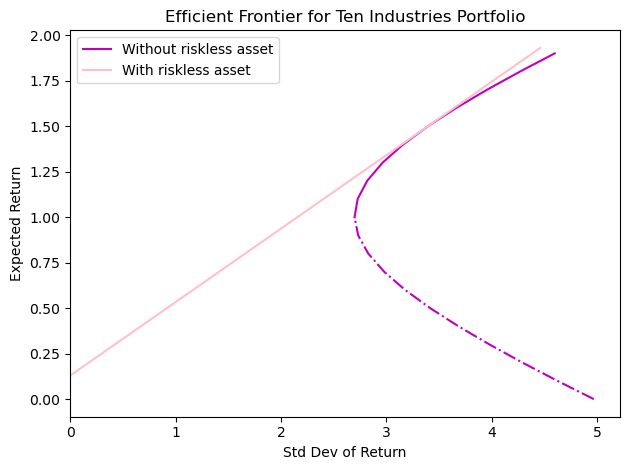

In [51]:
# Now let's plot for a riskless asset, taking risk-free rate at 0.13%

rfr=0.13

frontier_riskless_return = np.array(np.arange(0.13, 2.0, 0.1))
frontier_riskless_var = np.vectorize(lambda rp: (rp - rfr) ** 2 / (zeta - (2 * alpha * rfr) + 
                                                                   +(delta * (rfr ** 2))))(frontier_riskless_return) #slide 25
frontier_riskless_std = frontier_riskless_var ** 0.5
frontier_plot_riskless = pd.DataFrame(data = {"std_p_riskless": frontier_riskless_std, "r_p_riskless": frontier_riskless_return})

midpoint = int(len(frontier_plot) / 2)

# Plotting Efficient Frontier (without riskless assets)
plt.plot(frontier_plot.iloc[midpoint:]["stddev_minvar"], frontier_plot.iloc[midpoint:]["r_minvar"], "m-", label = "Without riskless asset")
plt.plot(frontier_plot.iloc[0:midpoint+1]["stddev_minvar"], frontier_plot.iloc[0:midpoint+1]["r_minvar"], "m-.")

# Plotting Efficient Frontier (with riskless assets)
plt.plot(frontier_plot_riskless["std_p_riskless"], frontier_plot_riskless["r_p_riskless"], "pink", label = "With riskless asset")

plt.title("Efficient Frontier for Ten Industries Portfolio")
plt.xlabel("Std Dev of Return")
plt.ylabel("Expected Return")
plt.xlim(left = 0)
plt.legend()
plt.tight_layout()

plt.show()

In [55]:
# Calculating Sharpe ratio
sharpe_ratio = (zeta - 2 * alpha * rfr + delta * ((rfr) ** 2)) ** 0.5
print('Sharpe ratio:', sharpe_ratio)

Sharpe ratio: 0.4035655993495088


In [62]:
# We see the lines are tangent! Let's calculate tangency portfolio and its weights

# Calculate tangency portfolio mean return
tg_portf_return = (alpha * rfr - zeta) / (delta * rfr - alpha)


lambda_tg = (tg_portf_return - rfr) / (zeta - (2 * alpha * rfr) + (delta * (rfr ** 2))) 
#slide 24 Lagrange Rtg, slide 11 for lamda and gamma

tangency_portfolio_weights = lambda_tg * np.matmul(inv_covar, (returns - rfr * e_vector))
#slide 24 portfolio weights, slide 10 to derive weights from eff frontier w/o riskless asset

tangency_portfolio = pd.DataFrame(data={"Weights": tangency_portfolio_weights}, index=portfolio.columns)

tangency_portfolio

,Weights
NoDur,0.567972
Durbl,-0.214073
Manuf,0.714105
Enrgy,0.104087
HiTec,-0.363438
Telcm,-0.095463
Shops,0.991647
Hlth,0.075570
Utils,0.132643
Other,-0.913051


In [ ]:
Minimum-variance frontier is a set of portfolios with given return that have the lowest amount of risk (low stdev)
Efficient frontier is a set of portfolios that give highest return for the lowest (or given) risk
Tangency portfolio is where efficient frontier touched the capital market line (is tangent to it). 
This portfolio is the only best solution and offers highest possible return with lowest risk